# 퍼셉트론

쉽게 말해 인공 뉴런이다.(실제 뉴런과는 다르다!)


## 2입력 퍼셉트론

퍼셉트론은 두 종류의 입력을 받는다.  
하나는 일반적인 실수 n개이고  
다른 하나는 가중치이다.  

</br>

그리고 반드시 -1 이나 1을 출력한다.  

</br>

i번째 입력과 가중치를 곱한다.  
그걸 n번 반복한다음 결과물들을 싹다 더한다.  
그 결과가 0보다 작으면 -1을, 크면 1을 출력한다.  

함수로 표현하면 다음과 같다.

In [1]:
def compute_output(w, x):
  z = 0.0
  for i in range(len(w)):
    z += x[i] * w[i]        # 두 입력의 i번째를 각각 곱한뒤 더한다.
  if z < 0:
    return -1
  else:
    return 1

이걸 한 번 써보자  

</br>

### !주의사항!
첫 번째 x 입력은 반드시 1이어야 한다.

In [2]:
compute_output([0.9, -0.6, -0.5], [1.0, -1.0, -1.0])

1

In [3]:
compute_output([0.9, -0.6, -0.5], [1.0, -1.0, 1.0])

1

In [4]:
compute_output([0.9, -0.6, -0.5], [1.0, 1.0, -1.0])

1

In [5]:
compute_output([0.9, -0.6, -0.5], [1.0, 1.0, 1.0])

-1

## 퍼셉트론 학습 알고리즘

퍼셉트론 학습 알고리즘은 **지도 학습 알고리즘** 이라고 부른다.  
지도란 훈련시킬 모델에 입력 데이터나 원하는 출력 데이터를 제시함을 뜻한다.  

</br>

알고리즘은 다음과 같이 동작한다.  
1. 가중치를 무작위로 초기화 한다.  
2. 입력/출력 쌍 하나를 무작위로 선택한다.  
3. 값 x1, x2....xn을 퍼셉트론에 제시하고 출력 y를 계산한다.  
4. 출력 y가 입력/출력 쌍의 정답과 다르면, 가중치를 다음과 같은 방법으로 조정한다.  
  a. y < 0 이면 각 wi에 nxi를 더한다.
  b. y > 0 이면 각 wi에 nxi를 뺀다.
5. 퍼셉트론이 모든 예시를 올바르게 예측할 때까지 2, 3, 4 단계를 반복한다.  


In [6]:
import random

def show_learning(w):
  print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])

# 훈련 과정을 통제하는 데 필요한 변수를 정의한다.
random.seed(7)  # 반복이 가능하도록
LEARNING_RATE = 0.1

index_list = [0, 1, 2, 3]   # 순서를 무작위화하기 위해

# 훈련 예제를 정의한다.
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)]
y_train = [1.0, 1.0, 1.0, -1.0]   # 출력 (정답)

# 퍼셉트론 가중치를 정의한다.
w = [0.2, -0.6, 0.25]

# 초기 가중치를 인쇄한다.
show_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


아까 보여줬던 퍼셉트론 함수를 다시 확인해보자

In [7]:
def compute_output(w, x):
  z = 0.0
  for i in range(len(w)):
    z += x[i] * w[i]        # 두 입력의 i번째를 각각 곱한뒤 더한다.
  if z < 0:
    return -1
  else:
    return 1

이제 다음 코드를 작성하자  
다음 코드는 퍼셉트론 훈련 루프를 포함한다.  
이는 중첩된 루프로, 안쪽 루프가 4개의 훈련 예제를 무작위로 실행한다.  


In [8]:
# 퍼셉트론 훈련 루프
all_correct = False
while not all_correct:            # all_correct의 값이 참이 아닐때까지 반복
  all_correct = True
  random.shuffle(index_list)      # 순서를 무작위로 섞는다.
  for i in index_list:
    x = x_train[i]                # x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)]
    y = y_train[i]                # y_train = [1.0, 1.0, 1.0, -1.0]   # 출력 (정답)
    p_out = compute_output(w, x)  # 섞은 훈련정보 i번째 x 가중치를 퍼셉트론 함수에 투입, 여기서 w는 위 코드의 w = [0.2, -0.6, 0.25]

    if y != p_out:                # 퍼셉트론이 내놓은 결과와 정답(y)가 일치 하지 않는다면
      for j in range(0, len(w)):  # 모든 w 값을 y * 0.1 * x 값으로 수정한다.
        w[j] += (y * LEARNING_RATE * x[j])    #   LEARNING_RATE = 0.1
      all_correct = False         # all_correct가 False가 되면서, 다시 While문을 반복한다.
      show_learning(w)    # 업데이트된 가중치를 보여준다.

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


지금까지는 입력이 두 값 (-1 또는 1) 중 하나만 받았다.  
그러나 그 어떠한 것도 실수 값을 넣는 것을 막지 않는다.  
즉, 퍼셉트론은 어떤 실수 조합이든 넣을 수 있고  
이는 출력에서 -1 또는 1을 내놓을 것이다.  

</br>

도표를 그려보자

w=0  0.20 , w1 = -0.60 , w2 =  0.25


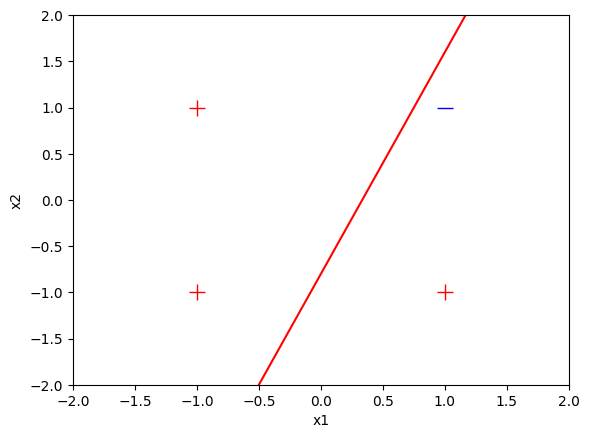

In [9]:
import matplotlib.pyplot as plt
import random

# 그리는데 필요한 변수를 정의
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

def show_learning(w):
  global color_index
  print('w=0', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])
  if color_index == 0:
    plt.plot([1.0], [1.0], 'b_', markersize=12)
    plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0], 'r+', markersize=12)
    plt.axis([-2, 2, -2, 2])
    plt.xlabel('x1')
    plt.ylabel('x2')
  x = [-2.0, 2.0]
  if abs(w[2]) < 1e-5:
    y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)),
         -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
  else:
    y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]),
         -w[1]/w[2]*(2.0)+(-w[0]/w[2])]
  plt.plot(x, y, color_list[color_index])
  if color_index < (len(color_list) - 1):
    color_index += 1

# 훈련과정을 통제하는 변수를 정의
random.seed(7)
LEARNING_RATE = 0.1
index_list = [0, 1, 2, 3]   # 순서 무작위화

# 훈련 예제를 정의한다.
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),
           (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # 입력
y_train = [1.0, 1.0, 1.0, -1.0] # 출력 (정답)

# 퍼셉트론 가중치 정의
w = [0.2, -0.6, 0.25] # 어떠한 무작위 숫자로 초기화

# 초기 가중치 인쇄 (위에 정의된 함수)
show_learning(w)

```
위 코드는 제대로 작동하지 않았다.  
원래는 선이 여러번 그어지면서, -영역과 +영역을 완벽하게 나누어야 한다.
```

## 퍼셉트론의 한계

2입력 퍼셉트론이 어떻게 데이터 지점의 두 그룹 사이에 직선을 그리는지 보았다.  
만일 직선이 데이터 지점을 분리할 수 없다면 어떨까?  
단일 퍼셉트론이 차트를 두 영역으로 분리할 수 있지만 늘 그럴 수 있는건 아니다.  
+영역과 -영역이 서로 교차하고 있다면 하나의 선만으로는 분리할 수 없을 것이다.  

</br>

## 여러 퍼셉트론 조합하기

직선 하나로 모든 + - 영역을 나누지 못한다면 선을 여러개 그으면 된다.  

</br>

## 선형대수로 퍼셉트론 구현하기

선형대수는 신경망을 다룰 떄 편리하다.  
퍼셉트론 가중치를 벡터와 행렬로 묘사하고  
퍼셉트론 계산의 일부가 내적, 행렬-벡터 곱, 행렬 곱은 많은 분야에서 중요하다.  

</br>

Numpy라는 패키지는 과학적 연산에 쓰인다.  
넘파이는 기본 선형대수 서브프로그램을 활용한다.  
CUDA코어를 위한 GPU 라이브러리, CUDA BLAS 라이브러리를 사용할 수 있다.  

</br>

선형대수를 이미 알고 있다고 가정하고 계속해보자  

</br>

---

# 벡터 표기법

각 뉴런을 위한 복수의 입력 x, 가중치 w, 중간적인 표현 z, 출력 y 가 있었다.  
이들은 단일 값으로 구성되어 스칼라 변수라고도 한다.  

단일 뉴런의 모든 입력 변수 x0, x1, ... xn 처럼 여러 변수가 함께 속해 있는 경우가 많다.  
이 경우, 아래 처럼 간결한 표기법으로 스칼라 값을 벡터 변수로 배열한다.  

</br>

x는 입력변수, w는 가중치다.

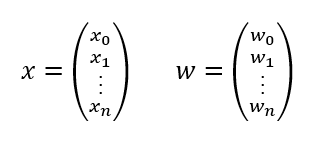

위와 같은 개념은 통상적으로 열 벡터라고 한다.  

행 벡터에 수평으로 배열할 수도 있다.  
행 벡터를 열 벡터로 변환할 때는 전치 연산을 사용한다.  
벡터 x와 그 전치는 아래와 같다.

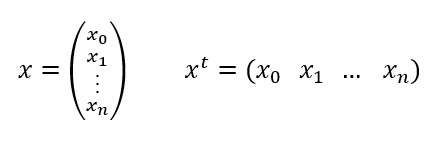

벡터의 합은 요소별 연산이다.  
아래 이미지와 같다.

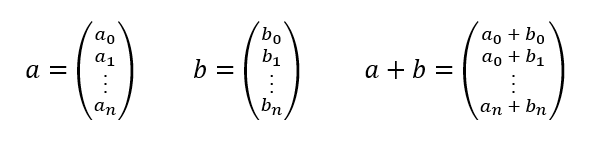

# 내적

두 벡터 연산 중, 또 다른 중요한 연산은 내적이다.  
내적은 벡터 합 처럼 두 벡터의 길이가 같을 때만 가능하다.  
이는 두 벡터의 각 요소를 곱한 뒤, 이들을 모두 더한다.  


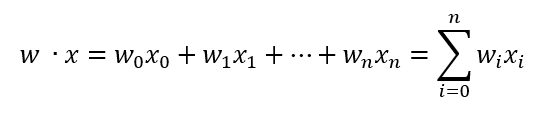

이것은 퍼셉트론에서 가중합 z를 계산하는 방법이다.  
즉, 입력을 벡터 x에, 가중치는 벡터 w라고 가정한다면  
퍼셉트론 연산은 다음과 같이 작성한다.  

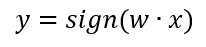

자, 이걸 코드로 작성해보자

In [10]:
import numpy as np
def compute_output_vector(w, x):
  z = np.dot(w, x)
  return np.sign(z)

# 벡터를 2차원 행렬로 확장하기

2차원 행렬은 다음과 같이 생겼다.

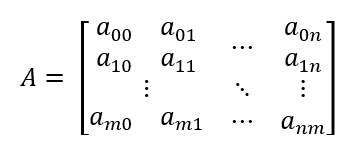